# CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project

In [ ]:
from os import getcwd, path

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import seaborn as sns

## Gather data, determine the method of data collection and provenance of the data (3 points)

Collected data Kaggle as a predefine dataset, https://www.kaggle.com/datasets/krishnaraj30/mall-visiting-customer-data

Stored in folder data

In [2]:
df = pd.read_csv(path.join(getcwd(), 'data', 'Mall_Customers.csv'))

## Identify an Unsupervised Learning Problem (6 points)

Problem: Determine that individuals spend more dependant on their income with in age and gender groups.

Method: Kmeans clustering, first we will group the data by age and gender, next to cluster individuals based on their income and spending.

## Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)

### Inspect

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
### Visualize

Text(0.5, 1.0, 'Age Distribution Histogram')

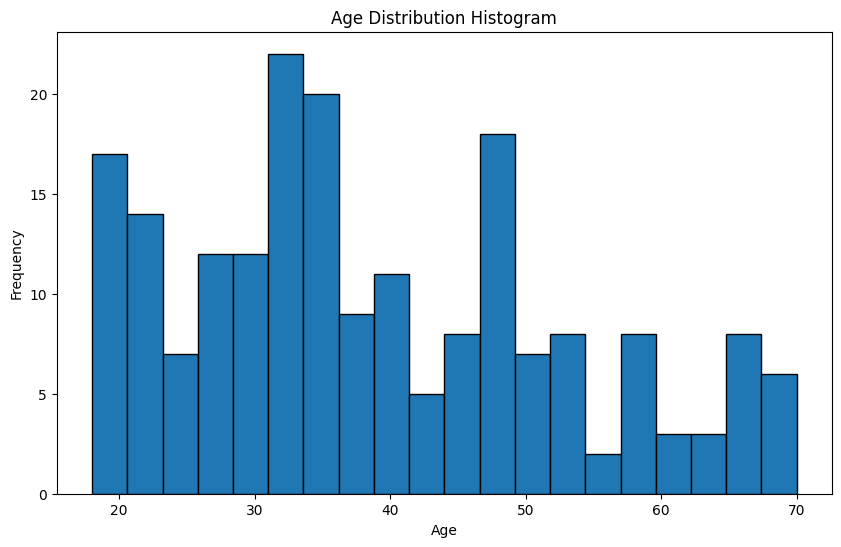

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

Text(0.5, 1.0, 'Annual Income Distribution')

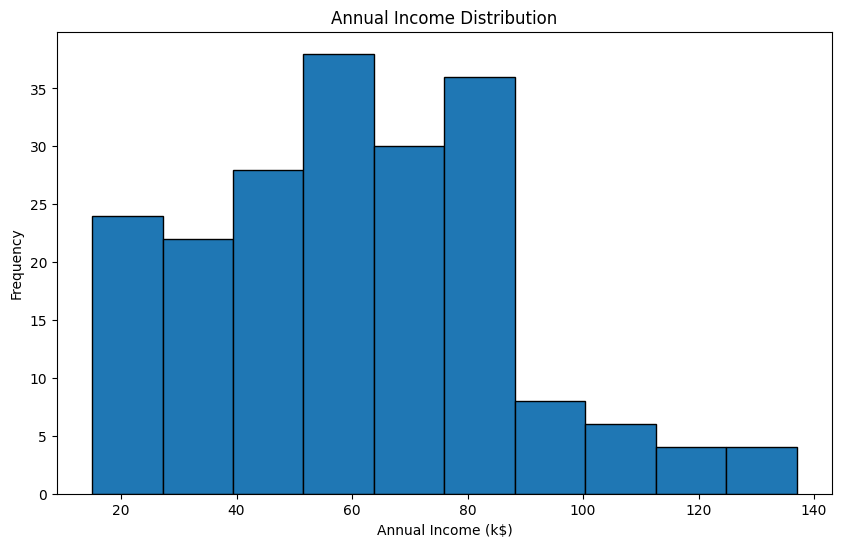

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Annual Income (k$)'], edgecolor='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')

Text(0.5, 1.0, 'Spending Score (1-100) Distribution')

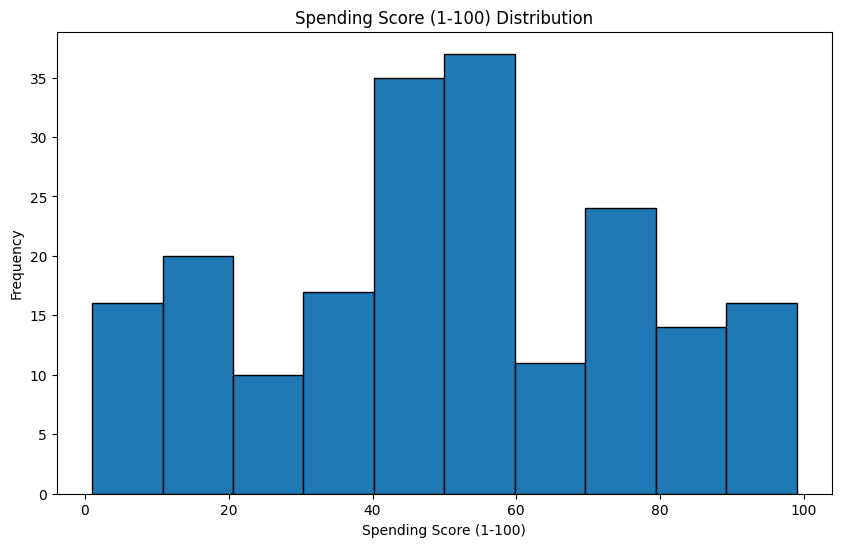

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Spending Score (1-100)'], edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Spending Score (1-100) Distribution')

### Factors

In [9]:
columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print(f'Age: Min({df['Age'].min()}), Max({df['Age'].max()})')
print(f'Annual Income (k$): Min({df['Annual Income (k$)'].min()}), Max({df['Annual Income (k$)'].max()})')
print(f'Spending Score (1-100): Min({df['Spending Score (1-100)'].min()}), Max({df['Spending Score (1-100)'].max()})')
print(f'Gender: {df['Gender'].unique()}')
print(df['Gender'].value_counts())

Age: Min(18), Max(70)
Annual Income (k$): Min(15), Max(137)
Spending Score (1-100): Min(1), Max(99)
Gender: ['Male' 'Female']
Gender
Female    112
Male       88
Name: count, dtype: int64


### Clean the Data

In [10]:
df = df.drop_duplicates()

### Hypothesis

I believe that as you make more money you are more inclined to spend it.

# Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)

In [11]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
kmeans_df = df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']]
scaled_kmeans_df = pd.DataFrame(scale(df),columns=list(df.columns))
cluster_size = 20
within_cluster_sum_squares = []
for i in range (1, cluster_size):
    kmeans = KMeans(i)
    kmeans.fit(scaled_kmeans_df)
    within_cluster_sum_squares.append(kmeans.inertia_)

### Resolve optimal clusting size, using Elbow method 

Text(0, 0.5, 'Within Cluster Sum of Squares')

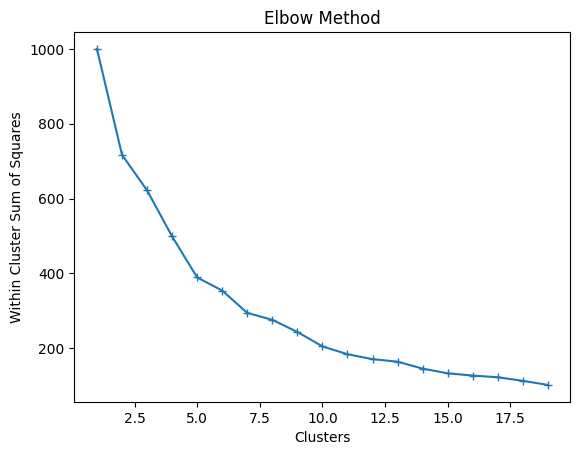

In [12]:
number_clusters = range(1, cluster_size)
plt.plot(number_clusters, within_cluster_sum_squares, marker = '+')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares')

### Dendrogram

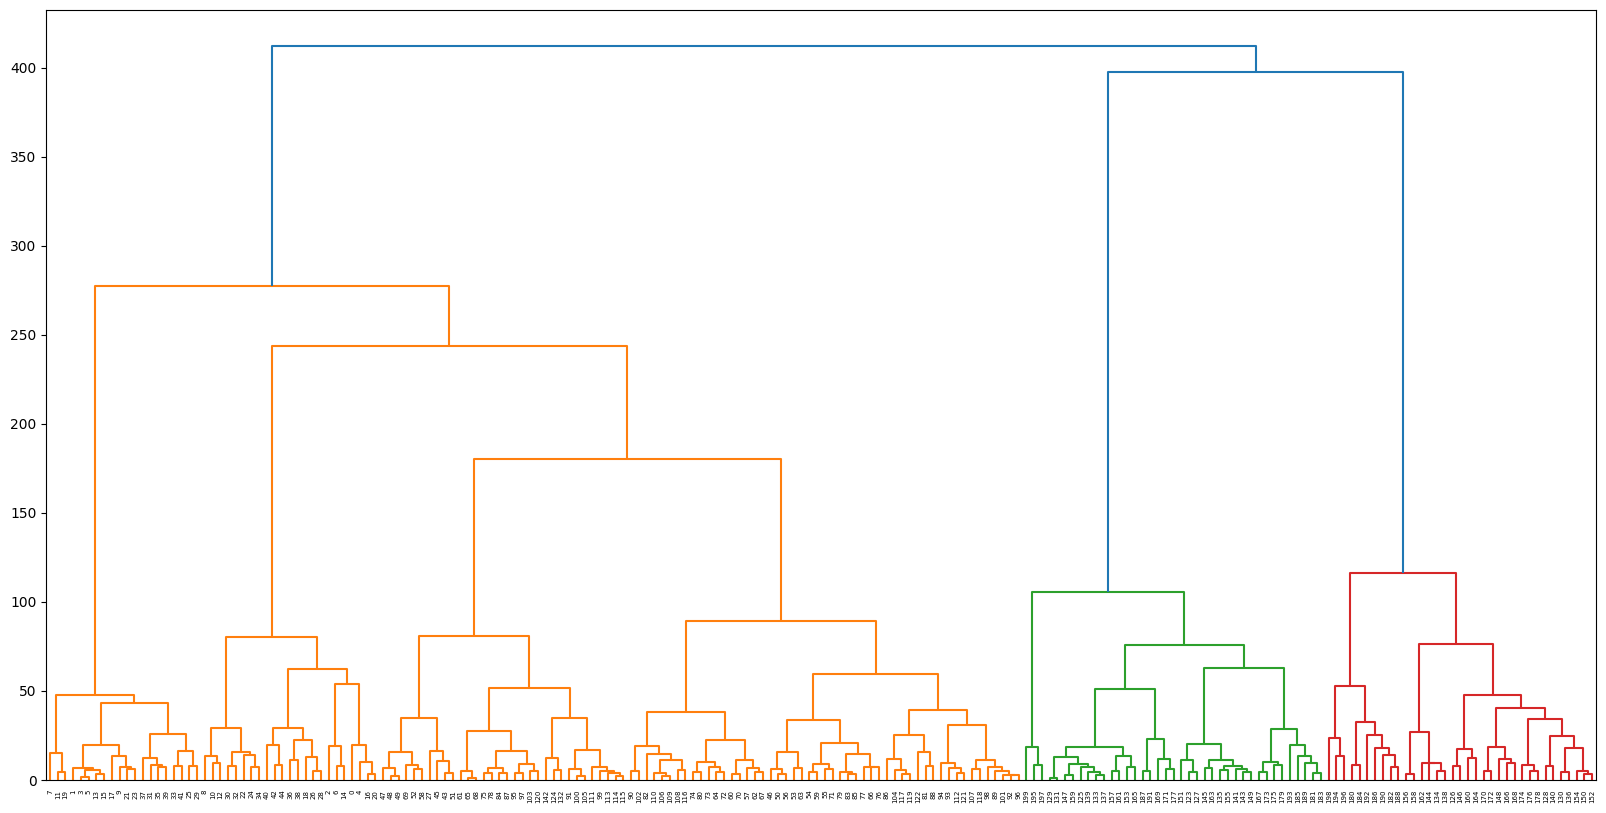

In [13]:
data = linkage(kmeans_df, method='ward', metric='euclidean')
plt.figure(figsize=(20,10))
dendrogram(data)
plt.show()

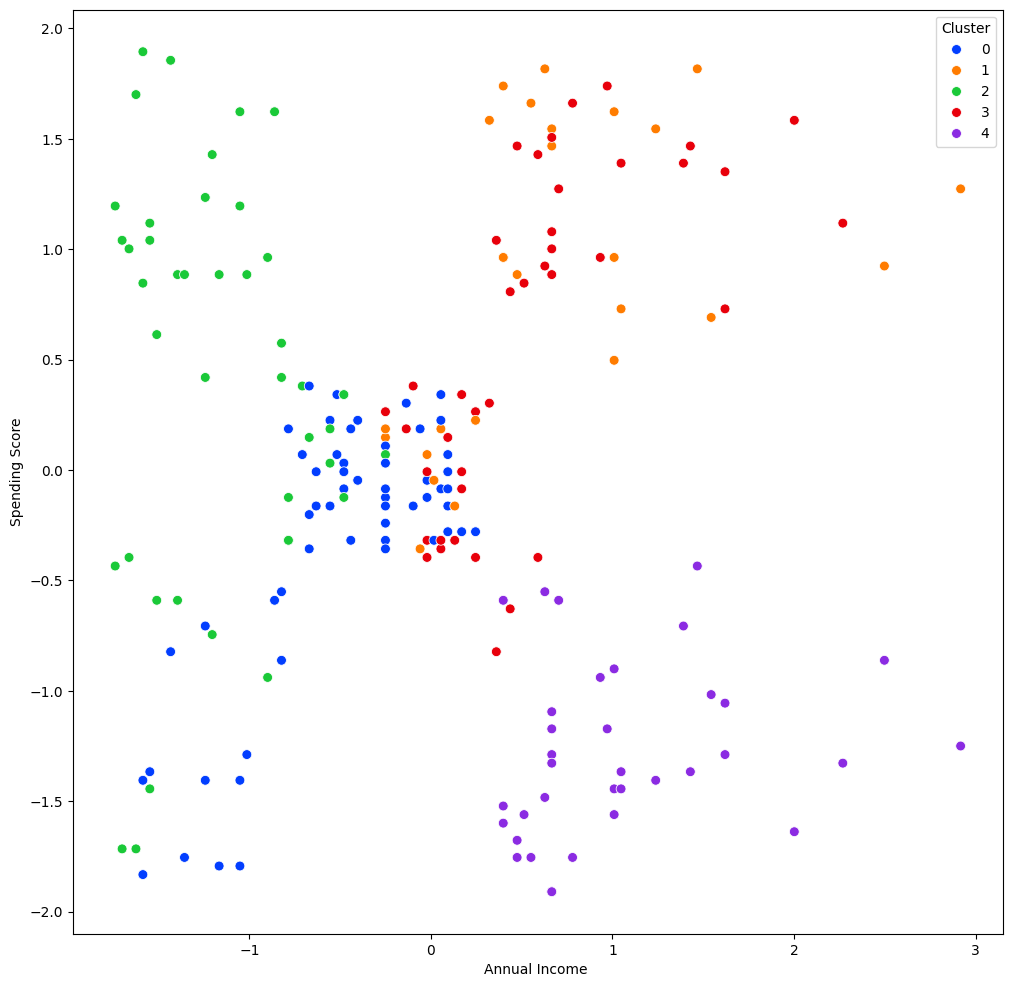

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
scaled_kmeans_df['Cluster'] = kmeans.fit_predict(scaled_kmeans_df)
plt.figure(figsize=(12,12))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=scaled_kmeans_df, palette='bright', s=50)
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')
plt.show()

## Conclusion

People often spend more money than the make. The people that make the most are often the most frugale.